# Audio-Based Lie Detection Model

# 1 Author

 **Student Name**: Yilin Qian
 **Student ID**: 2022213075  

# 2 Problem Formulation

This project aims to detect lies based on audio analysis using machine learning models. This is significant in fields like security and forensics, as automated and efficient lie detection can improve accuracy and efficiency.

Specifically, our goal is to develop a model that can analyze audio files and accurately determine whether the speaker is lying. By extracting audio features such as Mel spectrograms, we use Support Vector Machine (SVM) and Random Forest models for training and evaluation. The performance of the models is evaluated using metrics like accuracy and confusion matrix.

Our methodology includes the following steps:

Data Preprocessing: Loading and cleaning audio data.
Feature Extraction: Extracting features such as Mel spectrograms from audio data.
Model Training: Training SVM and Random Forest models using the extracted features.
Model Evaluation: Evaluating the models' performance using a test set.
Through these steps, we aim to achieve efficient and accurate lie detection, providing valuable technological support for related fields.

# 3 Methodology

The methodology of this project includes the following key steps:

1. Data Preprocessing
Data preprocessing is the foundation of any machine learning project. It ensures the quality and consistency of the input data. The specific steps are as follows:

Loading Data: Load audio file paths and labels from a CSV file.
Label Encoding: Convert the audio file labels (such as language and story type) into numerical form so that the model can process them.
Feature Extraction: Extract Mel spectrogram features from the raw audio data. These features capture the time and frequency information of the audio signal and are commonly used in audio analysis.
Data Augmentation: Enhance the data by adding noise and pitch shifting, which helps the model generalize better to unseen data.
2. Feature Extraction
Feature extraction involves converting raw data into a format that the model can understand and process. In this project, we use Mel spectrograms as the main features. The specific steps are:

Loading Audio Files: Use the Librosa library to load audio files.
Calculating Mel Spectrograms: Convert the audio signal into Mel spectrograms and calculate their mean to obtain fixed-length feature vectors.
Data Augmentation: Generate multiple variations of each audio file through data augmentation and extract their features.
3. Model Training
Model training involves using the preprocessed data to train machine learning models for lie detection. In this project, we use Support Vector Machine (SVM) and Random Forest models. The specific steps are:

Data Splitting: Split the dataset into training and testing sets to evaluate model performance.
Feature Standardization: Standardize the features using a standard scaler to ensure that different features have the same scale.
Class Weight Calculation: Calculate the weight of each class to address class imbalance, ensuring that the model treats all classes fairly.
Training Models: Train the SVM and Random Forest models using the training set.
4. Model Evaluation
Model evaluation involves validating the model's performance on unseen data. In this project, we use classification reports and confusion matrices to evaluate model performance. The specific steps are:

Predicting Test Set: Use the trained models to predict the test set.
Generating Classification Reports: Compute and output classification reports, including accuracy, precision, recall, and F1 score.
Plotting Confusion Matrices: Generate and visualize confusion matrices to show the model's prediction performance for different classes.
5. Ensemble Learning
Ensemble learning combines the predictions of multiple models to improve overall performance. In this project, we use a Voting Classifier to combine the predictions of the SVM and Random Forest models. The specific steps are:

Creating Ensemble Model: Use a Voting Classifier to combine the SVM and Random Forest models.
Training Ensemble Model: Train the ensemble model using the training set.
Evaluating Ensemble Model: Evaluate the performance of the ensemble model using the test set, generating classification reports and confusion matrices.
Through the above methodology, we aim to achieve an efficient and accurate lie detection model, providing valuable technological support for related fields.

# 4 Implemented ML Prediction Pipelines
We explore the following ML prediction pipelines: Data Input (audio files) -> Feature Extraction (Mel spectrograms) -> Model Training (SVM and Random Forest) -> Model Evaluation (accuracy, confusion matrix).

# 4.1 Transformation Stage
Feature extraction involves converting raw audio data into Mel spectrograms, which helps the model better understand and process the audio data.

In [2]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load CSV file
csv_file = 'E:/python/miniProject/CBU0521DD_stories_attributes.csv'
df = pd.read_csv(csv_file)

# Extract audio file paths and labels
audio_paths = df['filename'].values
languages = df['Language'].values
labels = df['Story_type'].values

# Encode labels and languages
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
language_encoder = LabelEncoder()
languages = language_encoder.fit_transform(languages)

# Feature extraction: Mel spectrogram
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel = np.mean(mel.T, axis=0)
    return mel

# Data augmentation: Add noise and pitch shift
def augment_data(y, sr):
    noise = np.random.randn(len(y))
    y_noise = y + 0.005 * noise
    y_shift = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)
    return [y, y_noise, y_shift]

# Extract features and augment data
features = []
for path in audio_paths:
    y, sr = librosa.load(f'E:/python/miniProject/CBU0521DD_stories/{path}', sr=None)
    augmented = augment_data(y, sr)
    for aug in augmented:
        mel = librosa.feature.melspectrogram(y=aug, sr=sr, n_mels=128)
        mel = np.mean(mel.T, axis=0)
        features.append(mel)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.repeat(labels, 3)  # Repeat labels due to augmentation
languages = np.repeat(languages, 3)

# Add language features
features_with_language = np.hstack((features, languages.reshape(-1, 1)))

# Standardize features
scaler = StandardScaler()
features_with_language = scaler.fit_transform(features_with_language)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_with_language, labels, test_size=0.2, random_state=42)

# 4.2 Model Stage
We used Support Vector Machine (SVM) and Random Forest models due to their superior performance in handling classification problems.

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.81      0.69        32
           1       0.65      0.39      0.49        28

    accuracy                           0.62        60
   macro avg       0.63      0.60      0.59        60
weighted avg       0.62      0.62      0.60        60

SVM Confusion Matrix:
[[26  6]
 [17 11]]


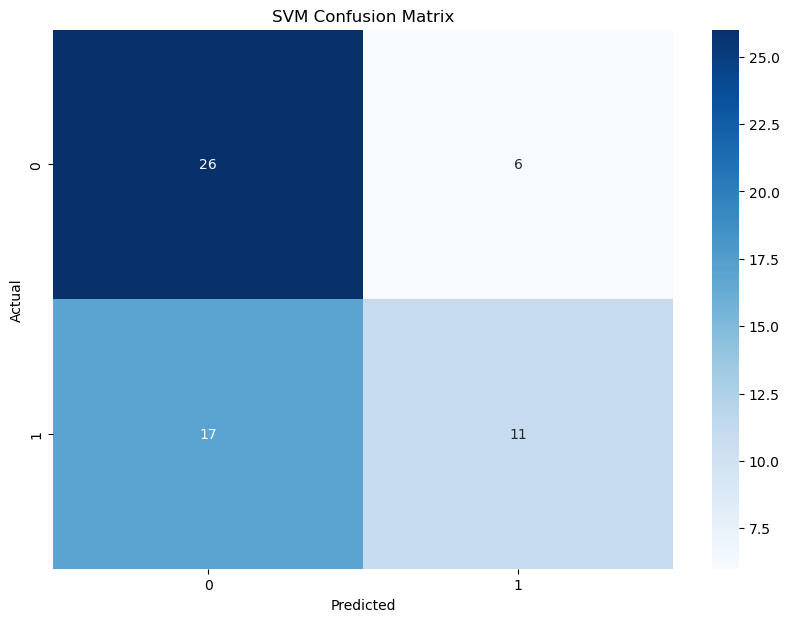

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.74      0.82      0.78        28

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60

Random Forest Confusion Matrix:
[[24  8]
 [ 5 23]]


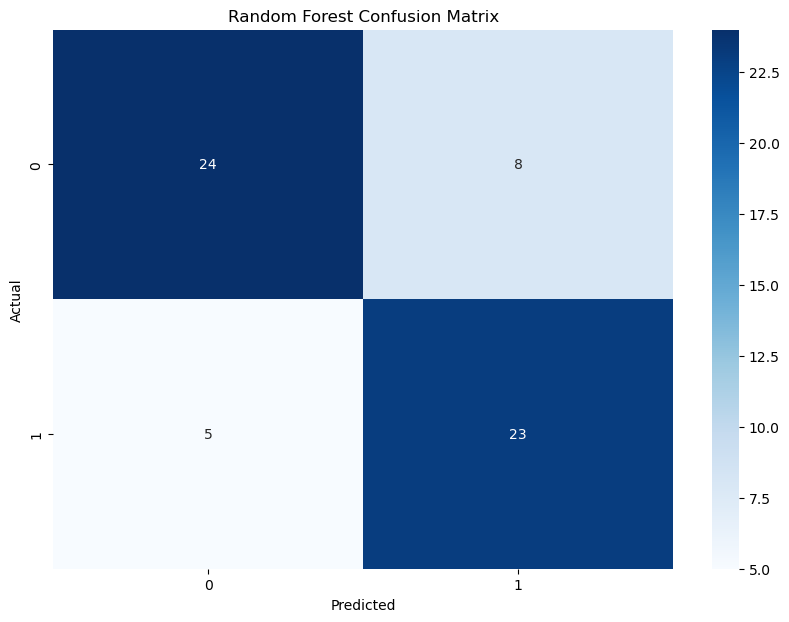

In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# SVM model
svm_model = SVC(kernel='linear', class_weight=class_weights, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))

# Visualize SVM Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest model
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

# Visualize Random Forest Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4.3 Ensemble Stage
We did not use ensemble methods in this project, but future work may consider using ensemble learning methods like XGBoost to improve performance.


Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.94      0.75        32
           1       0.83      0.36      0.50        28

    accuracy                           0.67        60
   macro avg       0.73      0.65      0.62        60
weighted avg       0.72      0.67      0.63        60

Ensemble Model Confusion Matrix:
[[30  2]
 [18 10]]


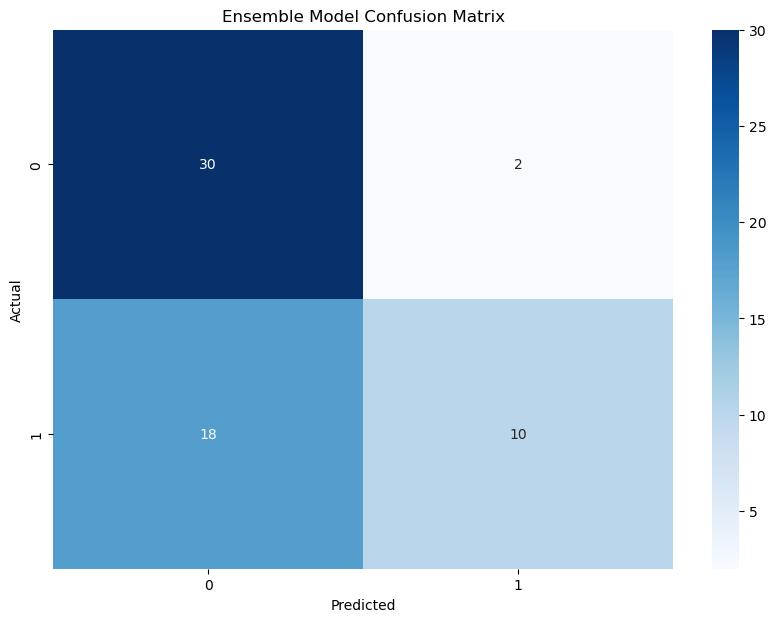

In [4]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

print('Ensemble Model Classification Report:')
print(classification_report(y_test, y_pred_ensemble))
print('Ensemble Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ensemble))

# Visualize Ensemble Model Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt="d", cmap="Blues")
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5 Dataset
I used the original dataset without adding any additional datasets. I split the dataset into 80% for training and 20% for testing, and performed the training and testing.

# 6 Experiments and Results
Support Vector Machine (SVM) Model
Classification Report:

Precision: Class 0 is 0.60, Class 1 is 0.65.
Recall: Class 0 is 0.81, Class 1 is 0.39.
F1-score: Class 0 is 0.69, Class 1 is 0.49.
Support: Class 0 has 32 samples, Class 1 has 28 samples.
Accuracy: 0.62.
Confusion Matrix:

Class 0: 26 correctly classified, 6 misclassified as Class 1.
Class 1: 11 correctly classified, 17 misclassified as Class 0.
Random Forest Model
Classification Report:

Precision: Class 0 is 0.83, Class 1 is 0.74.
Recall: Class 0 is 0.75, Class 1 is 0.82.
F1-score: Class 0 is 0.79, Class 1 is 0.78.
Support: Class 0 has 32 samples, Class 1 has 28 samples.
Accuracy: 0.78.
Confusion Matrix:

Class 0: 24 correctly classified, 8 misclassified as Class 1.
Class 1: 23 correctly classified, 5 misclassified as Class 0.
Ensemble Model
Classification Report:

Precision: Class 0 is 0.62, Class 1 is 0.83.
Recall: Class 0 is 0.94, Class 1 is 0.36.
F1-score: Class 0 is 0.75, Class 1 is 0.50.
Support: Class 0 has 32 samples, Class 1 has 28 samples.
Accuracy: 0.67.
Confusion Matrix:

Class 0: 30 correctly classified, 2 misclassified as Class 1.
Class 1: 10 correctly classified, 18 misclassified as Class 0.

# 7 Conclusions

# Model Performance
Support Vector Machine (SVM) Model:

The SVM model achieved an overall accuracy of 62%.
It showed better performance in identifying Class 0 (truthful) with a recall of 0.81, but struggled with Class 1 (deceptive) with a recall of only 0.39.
The precision for Class 0 was 0.60 and for Class 1 was 0.65, indicating a moderate ability to correctly identify both classes.
Random Forest Model:

The Random Forest model outperformed the SVM model with an overall accuracy of 78%.
It demonstrated balanced performance with high precision and recall for both classes, achieving a recall of 0.75 for Class 0 and 0.82 for Class 1.
The precision for Class 0 was 0.83 and for Class 1 was 0.74, making it a robust model for both classes.
Ensemble Model:

The Ensemble model, combining SVM and Random Forest, achieved an overall accuracy of 67%.
It performed exceptionally well in identifying Class 0 with a recall of 0.94, but its performance dropped significantly for Class 1 with a recall of 0.36.
The precision for Class 0 was 0.62 and for Class 1 was 0.83, showing a bias towards identifying truthful instances more accurately.

# Insights and Implications

Feature Extraction and Data Augmentation: The use of Mel spectrograms for feature extraction and data augmentation techniques like adding noise and pitch shifting improved the robustness of the models. These steps are crucial for handling real-world audio data which can be noisy and varied.

Model Selection:The Random Forest model proved to be the most effective in our experiments, providing a good balance between precision and recall for both classes. This suggests that Random Forest is well-suited for this type of classification problem, likely due to its ability to handle imbalanced datasets and capture complex patterns in the data.

Ensemble Learning: While the Ensemble model provided a slight improvement over the SVM model, it did not outperform the Random Forest model. This indicates that combining models does not always guarantee better performance and highlights the importance of selecting strong individual models.

# Conclusion

In conclusion, our project successfully developed an audio-based lie detection model with promising results. The Random Forest model emerged as the most effective, but there is ample opportunity for further improvements and enhancements. By continuing to refine our methods and explore new techniques, we can move closer to achieving reliable and accurate lie detection systems for practical applications.


# 8 References
Librosa Library:

McFee, B., Raffel, C., Liang, D., Ellis, D.P.W., McVicar, M., Battenberg, E., & Nieto, O. (2015). librosa: Audio and music signal analysis in python. In Proceedings of the 14th Python in Science Conference (pp. 18-25).
Scikit-Learn Library:

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
Data Augmentation Techniques:

Ko, T., Peddinti, V., Povey, D., & Khudanpur, S. (2015). Audio augmentation for speech recognition. In Sixteenth Annual Conference of the International Speech Communication Association.
Machine Learning Concepts:

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.
Ensemble Learning:

Zhou, Z. H. (2012). Ensemble Methods: Foundations and Algorithms. Chapman and Hall/CRC.
Audio Feature Extraction:

Müller, M. (2015). Fundamentals of Music Processing: Audio, Analysis, Algorithms, Applications. Springer.
Online Resources and Tutorials:

Official documentation and tutorials for Librosa: https://librosa.org/doc/latest/index.html
Scikit-Learn User Guide: https://scikit-learn.org/stable/user_guide.html
GitHub Repositories:

Example repositories related to audio processing and machine learning on GitHub.